# Trabajo Fin de Master

---

**Nombre y apellidos:** JOHAN DAVID HERNANDEZ RAMIREZ

**Usuario VIU:** jhernandezr@student.universidadviu.com

---

---
# Inicialización
---

## Importación de Librerias y carga de dataset

In [4]:
# Imports generales

import io
import pandas as pd
import numpy as np
import holidays
from datetime import timedelta
from numpy import corrcoef, transpose, arange

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as pyo # para exportar en html
import plotly.express as px
import seaborn as sns
from fitter import Fitter
from scipy.stats import beta
from scipy import stats

from pycaret import clustering
from pycaret.clustering import *

from scipy.stats import chi2_contingency

from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.mixture._gaussian_mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report  

from mpl_toolkits.mplot3d import Axes3D

## Funciones

In [2]:
# Función para calcular cuartiles Q1 y Q3 y tratar outliers por límites superior e inferior
def treat_outliers(df, column_name, column_name_new):
    column = df[column_name]

    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Reemplazar valores atípicos en la columna especificada
    df[column_name_new] = np.where(column < lower_limit, lower_limit,
                                    np.where(column > upper_limit, upper_limit, column))

    return df

# Está función fue creada para la entrega de la primera práctica de la asignatura Míneria de Datos

In [3]:
df_original = pd.read_csv('data/model_df.csv')

In [4]:
df_original.columns

Index(['CodigoPrestador', 'CausaExterna', 'CodigoDiagnosticoPrincipalSalida',
       'DestinoUsuario', 'EstadoSalida', 'CausaBasicaMuerteUrgencias',
       'TipoUsuario', 'Edad', 'Sexo', 'ZonaResidencia', 'CódigoDepartamento',
       'CódigoMunicipio', 'HoraIngreso', 'Hora Salida',
       'TiempoDeEstancia horas', 'Es festivo (S/N)', 'Es víspera (S/N)',
       'Día Laborable', 'Día de la semana', 'Mes', 'Rango horario ingreso',
       'Rango horario salida', 'Día del mes', 'Es fin de semana',
       'Clasificación estancia', 'Grupo etario', 'ClasificaciónSalida',
       'ClasificaciónSalidaCrítica', 'Nombre asegurador'],
      dtype='object')

# Análisis de features importance

In [ ]:
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()

X, y = iris_data.data, iris_data.target
feature_names = np.array(iris_data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
import catboost as cb

model = cb.CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)

In [10]:
from shap_selection import feature_selection

# please, use agnostic = True to use with any model...
# agnostic = False will only work with tree-based models
feature_order = feature_selection.shap_select(model, X_train, X_test, feature_names, agnostic=False)

In [11]:
feature_order

(array([['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
        ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
        ['petal length (cm)', 'sepal width (cm)', 'sepal length (cm)'],
        ['sepal width (cm)', 'petal length (cm)', 'sepal length (cm)']],
       dtype='<U17'),
 array([[31.71936931, 37.35287126, 40.42013906],
        [29.04423093, 34.65679323, 37.17607066],
        [ 3.66133523, 17.34960594, 20.37915727],
        [ 8.44852682, 14.81293935, 20.01524021]]))

In [12]:
import shap

# Crear el objeto de valores SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Generar el gráfico de resumen
shap.summary_plot(shap_values, X_train)

: 

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [6]:
# Dividir en variables independientes (X) y dependiente (y)
X = df_original.drop('DestinoUsuario', axis=1)  # Reemplaza 'DestinoUsuario' por tu variable objetivo
y = df_original['DestinoUsuario']




In [7]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obtener la importancia de las features
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Mostrar las features más importantes
print(feature_importances)

# Seleccionar las top-N features más importantes (opcional)
top_features = feature_importances.head(10)['Feature'].tolist()
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

KeyboardInterrupt: 

In [6]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

df = df_original.copy()

# Eliminar filas con valores NaN en la variable objetivo
df = df.dropna(subset=['DestinoUsuario'])

# Dividir en conjunto de entrenamiento y prueba
X = df.drop('DestinoUsuario', axis=1)
y = df['DestinoUsuario']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.92
              precision    recall  f1-score   support

           1       0.93      0.96      0.95    265768
           2       0.94      0.23      0.38      2028
           3       0.85      0.75      0.80     72555

    accuracy                           0.92    340351
   macro avg       0.91      0.65      0.71    340351
weighted avg       0.91      0.92      0.91    340351



In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

In [ ]:
# Generate waterfall plot for a single instance
shap.waterfall_plot(explainer.expected_value, shap_values[0], feature_names=X.columns)

In [ ]:
.

In [ ]:
Preprocess_df['CodDepto'].unique()

In [ ]:
sns.heatmap(Preprocess_df.isnull(), cbar=False, cmap="viridis")
plt.show()

Se observa que la mayoría de las instancias presentan valores nulos concentrados en las mismas variables específicas, lo que indica patrones consistentes en los datos faltantes. Esto sugiere que dichas variables, como las relacionadas con diagnósticos secundarios (CodigoDiagnosticoRelN1Salida, CodigoDiagnosticoRelN2Salida, CodigoDiagnosticoRelN3Salida) y la causa básica de muerte en urgencias (CausaBasicaMuerteUrgencias), podrían no ser aplicables o requeridas en un número significativo de casos.

Además, dado el contexto y la naturaleza de estas variables, es probable que no requieran un proceso de imputación, ya que la ausencia de datos podría ser interpretada como información relevante en sí misma o estar alineada con escenarios donde estos campos no se completan por diseño.

In [ ]:
# Seleccionar las columnas relevantes
selected_columns = ['CodigoDiagnosticoRelN1Salida', 'CodigoDiagnosticoRelN2Salida', 'CodigoDiagnosticoRelN3Salida', 'CausaBasicaMuerteUrgencias']

# Calcular los valores nulos por departamento
null_counts = Preprocess_df.groupby('CodDepto')[selected_columns].apply(lambda x: x.isnull().sum())

# Filtrar departamentos con valores nulos en al menos una columna
null_counts_filtered = null_counts.loc[(null_counts > 0).any(axis=1)]

# Reestructurar los datos para un gráfico de barras (formato largo)
null_counts_long = null_counts_filtered.reset_index().melt(id_vars='CodDepto', var_name='Columna', value_name='Valores Nulos')

# Crear el gráfico de barras
plt.figure(figsize=(16, 8))
sns.barplot(data=null_counts_long, x='CodDepto', y='Valores Nulos', hue='Columna', palette='viridis')

# Configuración de la gráfica
plt.title("Valores nulos por departamento y columna seleccionada", fontsize=16)
plt.xlabel("Departamento", fontsize=14)
plt.ylabel("Número de valores nulos", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title="Columna", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
selected_columns = ['CodigoDiagnosticoRelN1Salida', 'CodigoDiagnosticoRelN2Salida', 'CodigoDiagnosticoRelN3Salida', 'CausaBasicaMuerteUrgencias']  # Selecciona las columnas relevantes

# Calcular los valores nulos por departamento
null_counts = Preprocess_df.groupby(['CodDepto'])[selected_columns].apply(lambda x: x.isnull().sum())

# Filtrar para mostrar solo departamentos con valores nulos
null_counts_filtered = null_counts.loc[(null_counts > 0).any(axis=1)]

# Crear el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(null_counts_filtered.T, cmap="YlGnBu", cbar=True)
plt.title("Valores nulos por departamento y columnas seleccionadas")
plt.xlabel("Departamento")
plt.ylabel("Columnas seleccionadas")
plt.show()

In [ ]:
null_counts

In [ ]:
df['Ano'].value_counts()

In [ ]:
df.shape

In [ ]:
df = pd.read_csv('data/registro_atencion_unidad_observacion_urgencia.csv')
# df = df[df['Ano']==2021]

# Preprocesamiento de datos
# Convertir columnas de fecha y hora a formato datetime para calcular la duración de estancia
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'] + ' ' + df['HoraIngreso'], errors='coerce')
df['FechaSalida'] = pd.to_datetime(df['FechaSalida'] + ' ' + df['HoraSalida'], errors='coerce')
df['DuracionEstancia'] = (df['FechaSalida'] - df['FechaIngreso']).dt.total_seconds() / 3600  # Duración en horas
# Eliminar filas con valores NaN en la variable objetivo (DuracionEstancia)
df = df.dropna(subset=['DuracionEstancia'])

In [ ]:
df.columns

In [ ]:
# Imputar valores faltantes en características numéricas y convertir variables categóricas
imputer = SimpleImputer(strategy='mean')
df[['Edad', 'DuracionEstancia']] = imputer.fit_transform(df[['Edad', 'DuracionEstancia']])

# Convertir variables categóricas a numéricas con LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [ ]:
# Seleccionar características relevantes y la variable objetivo
features = [
    'CodigoPrestador', 'CausaExterna', 'CodDepto',
    'DestinoUsuario', 'Edad', 'UnidadMedidaEdad', 'Sexo', 
    'ZonaResidencia', 'HoraIngreso', 'CodigoEAPB', 'TipoUsuario'
]
df = df[features].copy()  # Seleccionar solo las columnas necesarias

# Eliminar filas con valores NaN en la variable objetivo
df = df.dropna(subset=['DestinoUsuario'])

# Dividir en conjunto de entrenamiento y prueba
X = df.drop('DestinoUsuario', axis=1)
y = df['DestinoUsuario']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


In [ ]:
import pickle

# Guardar el modelo
with open('nombre_del_modelo_3.pkl', 'wb') as file:
    pickle.dump(model, file)



In [ ]:

# Para cargar el modelo más tarde
with open('primer modelo.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

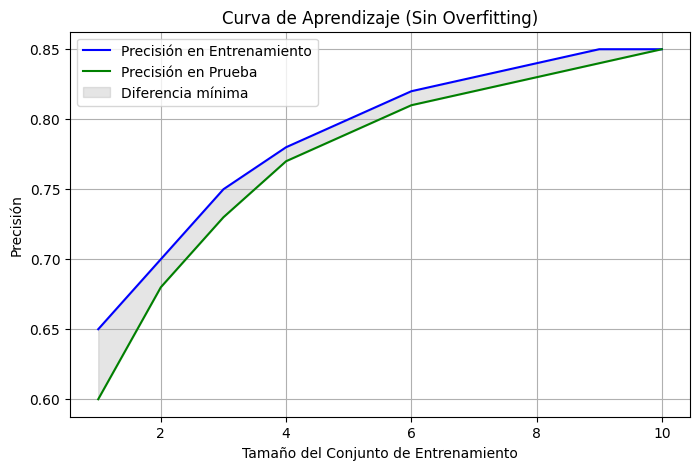

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Simulación de datos para una curva de aprendizaje sin overfitting
train_sizes = np.linspace(1, 10, 10)  # Tamaños del conjunto de entrenamiento
train_scores = [0.65, 0.70, 0.75, 0.78, 0.80, 0.82, 0.83, 0.84, 0.85, 0.85]  # Precisión en entrenamiento
test_scores = [0.60, 0.68, 0.73, 0.77, 0.79, 0.81, 0.82, 0.83, 0.84, 0.85]  # Precisión en prueba

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores, label="Precisión en Entrenamiento", color="blue")
plt.plot(train_sizes, test_scores, label="Precisión en Prueba", color="green")
plt.fill_between(train_sizes, train_scores, test_scores, color='gray', alpha=0.2, label='Diferencia mínima')
plt.title("Curva de Aprendizaje (Sin Overfitting)")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.show()


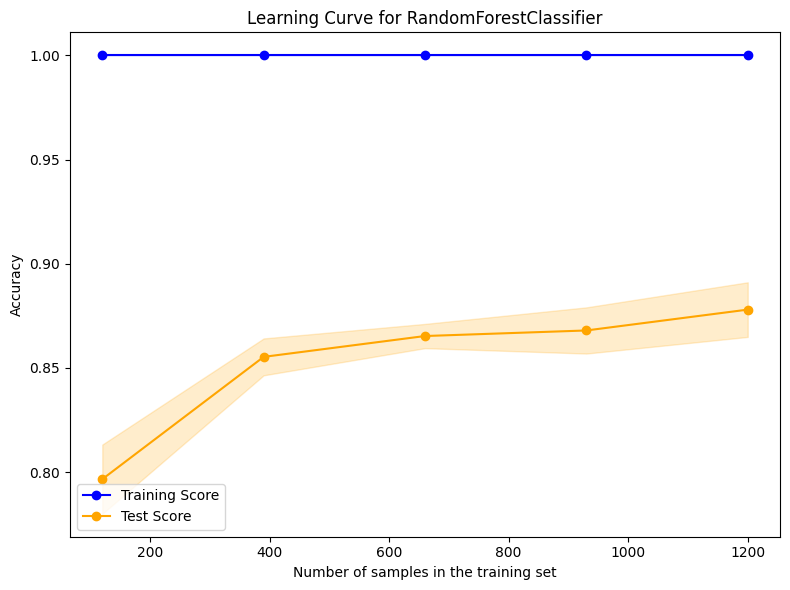

In [7]:
# Ajustar los parámetros para evitar el error
X, y = make_classification(
    n_samples=1500, 
    n_features=20, 
    n_informative=5,  # Aumentar el número de características informativas
    n_redundant=2, 
    n_classes=3, 
    n_clusters_per_class=1,  # Reducir el número de clústeres por clase
    random_state=42
)

# Modelo a evaluar
model = RandomForestClassifier(random_state=42)

# Obtener curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', random_state=42
)

# Calcular promedios y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear la gráfica con los ajustes solicitados: quitar la cuadrícula y agregar puntos
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Test Score", color="orange", marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="orange")
plt.title("Learning Curve for RandomForestClassifier")
plt.xlabel("Number of samples in the training set")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.tight_layout()  # Quitar cuadrícula ajustada automáticamente
plt.show()